<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/Previs%C3%A3o_de_Inadimpl%C3%AAncia_de_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Risco de Crédito**

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*

<center><img width="80%" src="http://images.unsplash.com/photo-1607863680198-23d4b2565df0?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>


<center>Photo by <a href="https://unsplash.com/@andretaissin?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Andre Taissin</a> on <a href="https://unsplash.com/s/photos/coin-bank?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a><center>
 




A inadimplência dos clientes é um problema que as instituições financeiras enfrentam, algo que pode trazer grande prejuízo a elas. Conseguir prever se um cliente irá deixar de cumprir suas obrigações financeiras com a empresa é muito importante já que pode evitar prejuízos à mesma.

As instituições financeiras -grandes bancos e fintechs- tem apostado cada vez mais em Inteligencia Artificial e Machine Learning com a finalidade de prever a inadimplência e então minimizar o risco de *default*.

> O desafio deste projeto é justamente este: **prever o *default* para reduzi-lo**, evitando prejuízos por inadimplência dos clientes.






In [ ]:
# ignorar warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalando pandas profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

# importando bibliotecas e pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# random seed
np.random.seed(1)

## Obtenção dos dados

Os dados utilizados para desenvolver esse projeto foram obtidos do *Default of Credit Card Clients Dataset* do UCI Machine Learning Repository disponível no [kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) e contém dados de clientes de cartões de crédito do Taiwan no ano de 2005.

O dataset possui informações dos pagamentos de inadimplência, dados de crédito, históricos de pagamentos e extratos de contas de **clientes do Taiwan de abril a setembro de 2005**.

### Agradecimentos

O dataset original encontra-se no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

Lichman, M. (2013). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml) . Irvine, CA: University of California, School of Information and Computer Science.



In [ ]:
# importando o arquivo csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/marinavillaschi/datafiles/main/UCI_Credit_Card.csv')

## Análise Exploratória dos Dados
Com os dados importados para um DataFrame, vamos dar início à primeira fase de um projeto de Machine Learning: a Análise Exploratória de Dados (*EDA - Exploratory Data Analysis*) onde vamos conhecer os dados a serem trabalhados.

### Variáveis e entradas


Vamos verificar:

* o tamanho do dataframe, ou seja, quantas entradas (linhas) e quantas variáveis (colunas) possui

In [ ]:
# verificando o tamanho do dataframe
print("Entradas:  ", df.shape[0], "\nVariáveis: ", df.shape[1])

Entradas:   30000 
Variáveis:  25


* As primeiras entradas do dataframe



In [ ]:
# verificando as primeiras entradas do dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


* os nomes das variáveis (colunas) e seus tipos

In [ ]:
# verificando as colunas e tipos
print("Tipos de variáveis:\n")
print(df.dtypes)

Tipos de variáveis:

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


* a descrição das variáveis

  * `ID`: ID do cliente
  * `LIMIT_BAL`: valor do crédito concedido, na moeda local (novo dólar taiwanês), inclui crédito individual e familiar/suplementar
  * `SEX`: gênero do cliente (1=masculino, 2=feminino)
  * `EDUCATION`: grau de escolaridade (1=pós graduação, 2=ensino superior, 3=ensino médio, 4=outro, 5=desconhecido, 6=desconhecido)
  * `MARRIAGE`: estado civil (1=casado, 2=solteiro, 3=outro)
  * `AGE`: idade (anos)
  * `PAY_0`: status do pagamento da conta de setembro de 2005 (-1= paga em dia, 1= atraso de pagamento por um mês, 2= atraso de pagamento por dois meses, … 8= atraso de pagamento por oito meses, 9= atraso de pagamento por nove meses ou mais)
  * `PAY_2`: status do pagamento da conta de agosto de 2005 (mesma escala acima)
  * `PAY_3`: status do pagamento da conta de julho de 2005 (mesma escala acima)
  * `PAY_4`: status do pagamento da conta de junho de 2005 (mesma escala acima)
  * `PAY_5`: status do pagamento da conta de maio de 2005 (mesma escala acima)
  * `PAY_6`: status do pagamento da conta de abril de 2005 (mesma escala acima)
  * `BILL_AMT1`: valor da conta de setembro de 2005, na moeda local (novo dólar taiwanês)
  * `BILL_AMT2`: valor da conta de agosto de 2005, na moeda local (novo dólar taiwanês)
  * `BILL_AMT3`: valor da conta de julho de 2005, na moeda local (novo dólar taiwanês)
  * `BILL_AMT4`: valor da conta de junho de 2005, na moeda local (novo dólar taiwanês)
  * `BILL_AMT5`: valor da conta de maio de 2005, na moeda local (novo dólar taiwanês)
  * `BILL_AMT6`: valor da conta de abril de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT1`: valor do pagamento anterior em setembro de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT2`: valor do pagamento anterior em agosto de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT3`: valor do pagamento anterior em julho de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT4`: valor do pagamento anterior em junho de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT5`: valor do pagamento anterior em maio de 2005, na moeda local (novo dólar taiwanês)
  * `PAY_AMT6`: valor do pagamento anterior em abril de 2005, na moeda local (novo dólar taiwanês)
  * `default.payment.next.month`: pagamento do *default* (1=sim, 0=não)

Aqui já é possível fazer algumas observações iniciais:
* a coluna `ID` é praticamente um índice e podemos **eliminá-la** pois não tem informação relevante para esta análise

* as colunas `EDUCATION` e `MARRIAGE` são variáveis categóricas múltiplas, então vamos **codificá-las**.

* o mesmo se aplica para as colunas `PAY_0` a `PAY_6` e também vamos **codificá-las**

* as variáveis `BILL_AMT1` a `BILL_AMT6` e `PAY_AMT1` a `PAY_AMT6` são do tipo *float* e por ora não precisamos modificar nada nelas.

* A coluna `default.payment.next.month` é nossa **variável alvo**.



Vamos verificar o resumo estatístico das variáveis numéricas.

In [ ]:
# verificando o resumo estatístico das variáveis numéricas
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Pelo resumo estatístico já conseguimos observar algo estranho nas variáveis `EDUCATION` e `MARRIAGE` que apresentam `min=0` quando em suas descrições o 0 não era uma opção de entrada.

Outro ponto que chama a atenção é em relação às variáveis `PAY_0` a `PAY_6` que apresentam `min=-2` e mediana=0, sendo que nenhum desses dois valores foram citados como opção de entrada em suas descrições.

A princípio não identificamos *outliers*, vamos verificar plotando alguns boxplots.

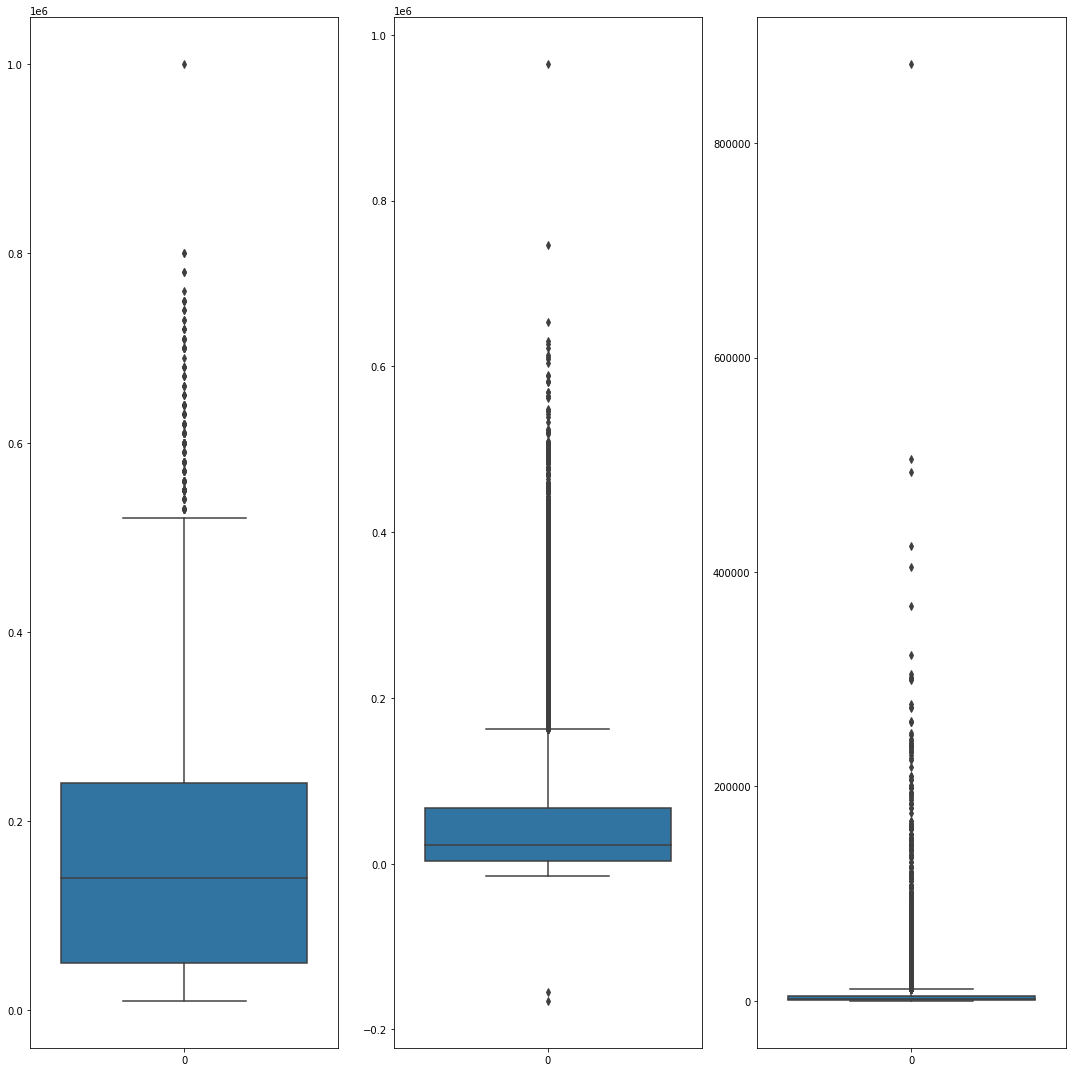

In [ ]:
# plotando os boxplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
sns.boxplot(data=df.LIMIT_BAL, ax=ax1, orient="v")
sns.boxplot(data=df.BILL_AMT1, ax=ax2, orient="v")
sns.boxplot(data=df.PAY_AMT1, ax=ax3, orient="v")
plt.tight_layout()

### Valores Ausentes

Vamos verificar a proporção de dados ausentes em cada coluna, ou seja, dados faltantes.

Quanto mais dados ausentes um dataset possui, mais ele perde em qualidade. Existem maneiras de tratar essa falta de dados, mas jamais será o equivalente a tê-los.

In [ ]:
# verificando a proporção dos dados ausentes em cada coluna
print("Proporção de valores ausentes:\n")
print((df.isnull().sum()/df.shape[0]).sort_values())

Proporção de valores ausentes:

ID                            0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
BILL_AMT1                     0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
default.payment.next.month    0.0
dtype: float64


O dataset aparentemente não apresenta valor ausente em nenhuma coluna. Isso indicaria ótima qualidade, porém é necessário investigarmos mais afundo pois essa pode não ser a realidade.

Vamos investigar os valores únicos de cada variável para verificar se estão de acordo com a descrição das mesmas.

In [ ]:
print("Valores únicos:\n")
print(df.nunique())

Valores únicos:

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


Algumas variáveis categóricas parecem suspeitas, vamos entender o porquê:

* `EDUCATION` possui 7 valores únicos, porém em sua descrição vimos que ela deveria apresentar valores de 1 a 6.

* `MARRIAGE` possui 4 valores únicos e sua descrição indica apenas 3.

* `PAY_0` a `PAY_4` apresentam 11 valores únicos, sendo apenas 10 em sua descrição.

Vamos então visualizar quais os valores únicos de cada uma dessas colunas, assim como a quantidade de cada um deles.


In [ ]:
# verificando os valores únicos das variáveis EDUCATION e MARRIAGE
print("Valores únicos de EDUCATION:\n")
print(df.EDUCATION.value_counts())
print("\n\nValores únicos de MARRIAGE:\n")
print(df.MARRIAGE.value_counts())

Valores únicos de EDUCATION:

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Valores únicos de MARRIAGE:

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


A variável `EDUCATION` apresenta 14 entradas de valor `0`. Neste caso vamos substituir essas entradas por `4` que representa "outro". Faremos isso também para as entradas `5` e `6` que representam "desconhecido". Todas essas entradas são redundantes e serão agrupadas em `4` representando "outro".

A variável `MARRIAGE` apresenta 54 entradas de valor `0`. Vamos substituir essas entradas por `3` que representa "outro", agrupando-as.


In [ ]:
# verificando os valores únicos das variáveis PAY_0 a PAY_6
print("\n\nValores únicos de PAY_0:\n")
print(df.PAY_0.value_counts())
print("\n\nValores únicos de PAY_2:\n")
print(df.PAY_2.value_counts())
print("\n\nValores únicos de PAY_3:\n")
print(df.PAY_3.value_counts())
print("\n\nValores únicos de PAY_4:\n")
print(df.PAY_4.value_counts())
print("\n\nValores únicos de PAY_5:\n")
print(df.PAY_5.value_counts())
print("\n\nValores únicos de PAY_6:\n")
print(df.PAY_6.value_counts())



Valores únicos de PAY_0:

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Valores únicos de PAY_2:

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Valores únicos de PAY_3:

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Valores únicos de PAY_4:

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64


Valores únicos de PAY_5:

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


Valores únicos de PAY_6:

 0    16286
-1     5740
-2     4895
 2     2766
 3    

As variáveis `PAY_0` a `PAY_6` apresentam grande volume de entradas com valor `0` e outro volume considerável de valores `-2`.

Vamos trabalhar com a hipótese de que ambos esses valores (`0` e `-2`) representam que a conta foi devidamente paga sem atrasos, ou seja, podem ser substituídas por `-1`, sendo assim agrupadas à categoria de conta paga em dia.

### Distribuição da variável alvo

Vamos plotar um gráfico de barras para avaliar o balanceamento da variável `default.payment.next.month` que é nossa variável alvo, ou seja, aquela que queremos prever.


0    23364
1     6636
Name: default.payment.next.month, dtype: int64


Inadimplência = 28.4 %




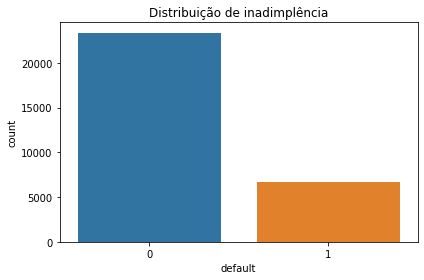

In [ ]:
# verificando o balanceamento da variável default.payment.next.month 
print(df['default.payment.next.month'].value_counts())
print('\n')
print('Inadimplência =', round(((df.loc[df['default.payment.next.month'] == 1].shape[0])/(df.loc[df['default.payment.next.month'] == 0].shape[0])*100),2),'%')
print('\n')

# imprimindo countplot
fig, ax = plt.subplots()
sns.countplot(x=df['default.payment.next.month'], ax=ax)
ax.set_title('Distribuição de inadimplência')
ax.set_xlabel('default')
plt.tight_layout()

O dataset apresenta **desbalanceamento leve** da variável alvo.

De forma geral, os modelos conseguem melhor desempenho em datasets balanceados, no entanto, iremos treinar primeiramente com a distribuição verdadeira dos dados. Caso seja necessário, ou seja, caso o modelo não generalize e não apresente bom desempenho, faremos o balanceamento.

### Correlação entre variáveis

Vamos explorar a correlação entre as variáveis numéricas.

Através do coeficiente de correlação criamos uma matriz de correlação e geramos um *heatmap* para melhor visualização.

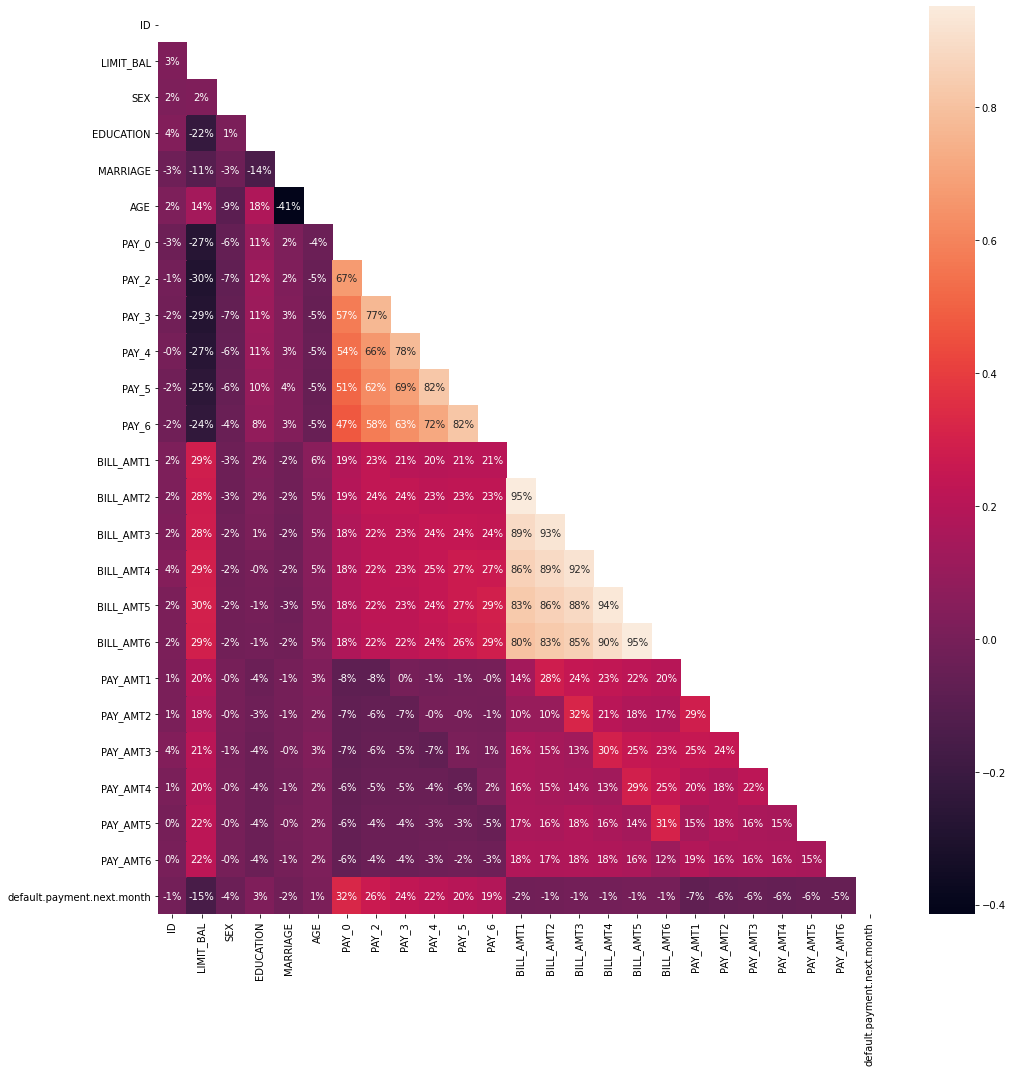

In [ ]:
# criando matriz de correlação
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

Antes de realizarmos qualquer limpeza, balanceamento ou padronização é possível observar que a variável alvo não tem correlação alta com nenhuma das variáveis. Isso certamente irá mudar após realizarmos a preparação dos dados.

De toda forma, é interessante já pontuarmos:
* as variáveis `PAY_0` a `PAY_6` apresentam certa correlação positiva com a variável alvo, assim como entre si, o que faz sentido já que o status dos pagamentos das contas (em dia ou atrasada em x meses) tem influência na chance de inadimplência do mês seguinte.
* a variável `LIMIT_BAL` apresenta correlação positiva com as variáveis `BILL_AMT1` a `BILL_AMT6` o que era esperado.
* as variáveis `BILL_AMT1` a `BILL_AMT6` também tem correlação positiva entre si e faz sentido pois os valores das contas dos clientes tende a permanecer num padrão.


## Preparação dos dados

* **Limpar** os dados agrupando entradas das variáveis identificadas anteriormente;

* **Selecionar** as variáveis que são interessantes e eliminar as que não serão úteis ou são menos relevantes ao modelo;

* **Codificar** variáveis categóricas (binárias e múltiplas) em numéricas discretas;

> * **Dividir** o dataset em treino e teste;
> 
> * **Padronizar** o dataset.

### Limpeza dos dados

Faremos as substituições necessárias nas entradas das variáveis categóricas `EDUCATION`, `MARRIAGE` e `PAY_0` a `PAY_6` agrupando valores conforme explicado anteriomente.

In [ ]:
# criando uma cópia de df para realização da limpeza
df_clean = df.copy()

# substituindo valores 0, 5 e 6 da variável EDUCATION por 4
df_clean.loc[df_clean.EDUCATION == 0, 'EDUCATION'] = 4
df_clean.loc[df_clean.EDUCATION == 5, 'EDUCATION'] = 4
df_clean.loc[df_clean.EDUCATION == 6, 'EDUCATION'] = 4

# substituindo valores 0 da variável MARRIAGE por 3
df_clean.loc[df_clean.MARRIAGE == 0, 'MARRIAGE'] = 3

# substituindo valores 0 e -2 das variáveis PAY_0 a PAY_6 por -1
df_clean.loc[df_clean.PAY_0 <= 0, 'PAY_0'] = -1
df_clean.loc[df_clean.PAY_2 <= 0, 'PAY_2'] = -1
df_clean.loc[df_clean.PAY_3 <= 0, 'PAY_3'] = -1
df_clean.loc[df_clean.PAY_4 <= 0, 'PAY_4'] = -1
df_clean.loc[df_clean.PAY_5 <= 0, 'PAY_5'] = -1
df_clean.loc[df_clean.PAY_6 <= 0, 'PAY_6'] = -1

# verificando os novos valores únicos das variáveis após limpeza
print("Valores únicos de EDUCATION após limpeza:\n")
print(df_clean.EDUCATION.value_counts())
print("\n\nValores únicos de MARRIAGE após limpeza:\n")
print(df_clean.MARRIAGE.value_counts())
print("\n\nValores únicos de PAY_0 após limpeza:\n")
print(df_clean.PAY_0.value_counts())
print("\n\nValores únicos de PAY_2 após limpeza:\n")
print(df_clean.PAY_2.value_counts())
print("\n\nValores únicos de PAY_3 após limpeza:\n")
print(df_clean.PAY_3.value_counts())
print("\n\nValores únicos de PAY_4 após limpeza:\n")
print(df_clean.PAY_4.value_counts())
print("\n\nValores únicos de PAY_5 após limpeza:\n")
print(df_clean.PAY_5.value_counts())
print("\n\nValores únicos de PAY_6 após limpeza:\n")
print(df_clean.PAY_6.value_counts())

Valores únicos de EDUCATION após limpeza:

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


Valores únicos de MARRIAGE após limpeza:

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


Valores únicos de PAY_0 após limpeza:

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Valores únicos de PAY_2 após limpeza:

-1    25562
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Valores únicos de PAY_3 após limpeza:

-1    25787
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Valores únicos de PAY_4 após limpeza:

-1    26490
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64


Valores únicos de PAY_5 após limpeza:

-1    27032
 2     2626
 3      178


### Seleção de variáveis

Iremos desconsiderar a variável `ID`, conforme identificamos anteriormente ela não é relevante para a construção do nosso modelo.

In [ ]:
# deletando a coluna ID
df_clean.drop('ID', axis=1, inplace=True)

# verificando as colunas remanescentes
print("Colunas após limpeza:\n")
print(df_clean.info())

Colunas após limpeza:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT

Vamos plotar nova matriz de correlação para verificar se a limpeza afetou as correlações das variáveis.

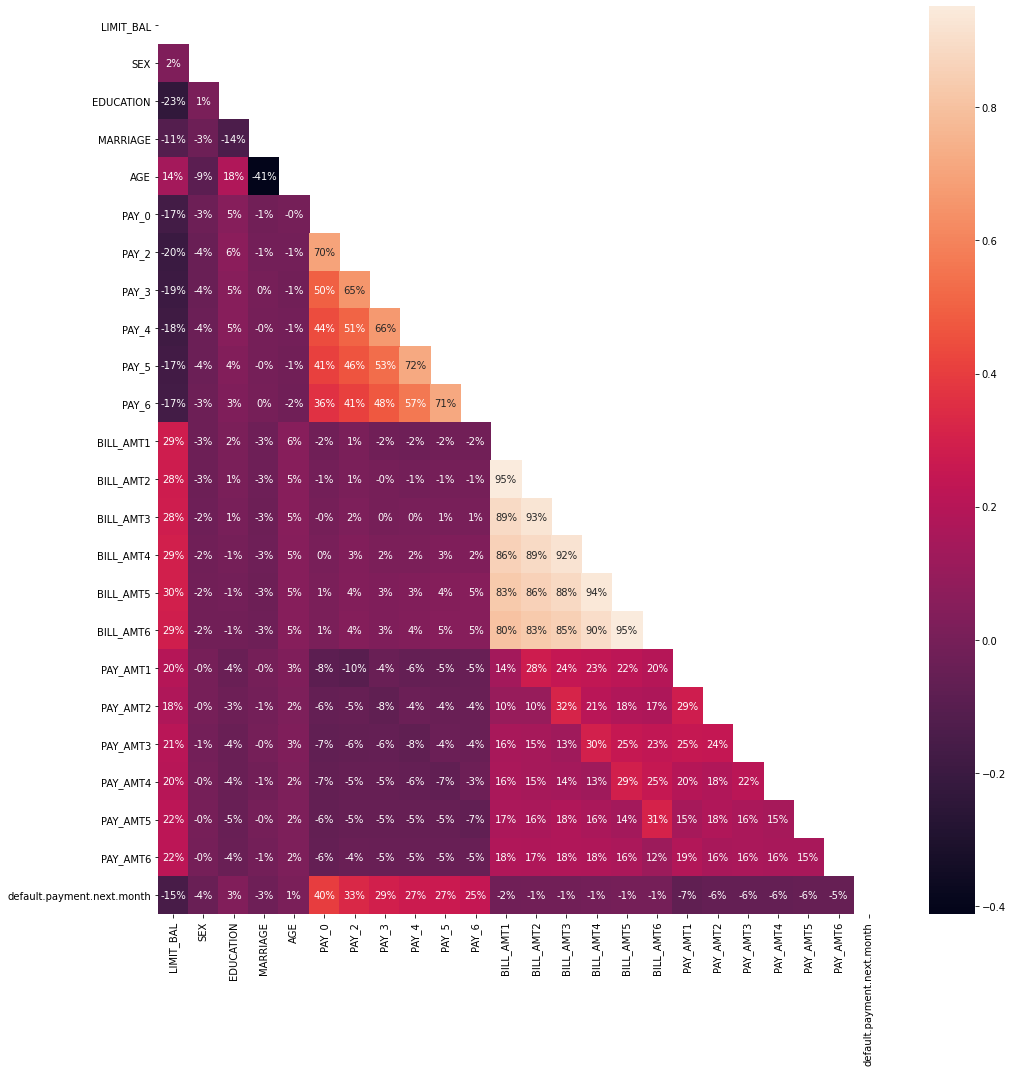

In [ ]:
# criando nova matriz de correlação
corr_clean = df_clean.corr()
mask = np.triu(np.ones_like(corr_clean, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corr_clean, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

É possível perceber um pequeno aumento na correlação da vaiável alvo com as variáveis `PAY_0` a `PAY_6`. 

### Codificação das variáveis categóricas

Faremos a transformação das variáveis categóricas múltiplas `EDUCATION`, `MARRIAGE` e `PAY_0` a `PAY_6` com `get_dummies`.

In [ ]:
# criando uma cópia de df_clean para realizar codificações
df_prep = df_clean.copy()

# gerando valores binários com get_dummies
df_prep = pd.get_dummies(df_prep, columns=['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

# verificando a aparencia após codificação
df_prep.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000.0,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.0,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000.0,2,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora nosso dataset está preparado para a próxima etapa: modelagem. 

### Divisão do dataset

Vamos dividir o dataset entre treino e teste. Os dados de teste serão usados somente ao final.

In [ ]:
# separando em feature matrix (X) e target vector (y)
X = df_prep.drop('default.payment.next.month', axis=1)
y = df_prep['default.payment.next.month']

# dividindo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

# verificando o formato dos dados após divisão
print('Formato de X_train:', X_train.shape)
print('Formato de y_train:', y_train.shape)
print('Formato de X_test:', X_test.shape)
print('Formato de y_test:', y_test.shape)

Formato de X_train: (22500, 66)
Formato de y_train: (22500,)
Formato de X_test: (7500, 66)
Formato de y_test: (7500,)


## Modelos de Machine Learning

Para escolher o modelo final, iremos realizar alguns testes.

Como premissa de projeto, iremos avaliar as métricas **recall** e **F-1 score**. Vamos entender o porquê da escolha dessas métricas.

O objetivo é prever o *default*, ou seja, quando um cliente ficará inadimplente. Para isso, queremos que o número de *true positives* (verdadeiro=1, previsto=1) seja o mais alto possível e o número de *false negatives* (verdadeiro=1, previsto=0) seja o menor possível.

Por outro lado, se o modelo prever alguns *false positives* (verdadeiro=0, previsto=1), não há tanto problema pois esse erro não custará tão caro para a instituição financeira. Logo, a acurácia do modelo não é nossa métrica de maior preocupação para este projeto.

### Padronização e Balanceamento

Primeiramente vamos treinar um modelo de base com os dados desbalanceados e padronizados com StandardScaler para obtermos o desempenho.

Em seguida, faremos testes com 2 tipos de padronização (`StandardScaler` e `MinMaxScaler`) e 2 tipos de balanceamento (`RandomUnderSampler` e `SMOTE`) afim de escolhermos a melhor dupla de padronização e balanceamento.

O modelo escolhido para realizar esses testes foi **Logistic Regression**.

**Baseline - StandardScaler + dados desbalanceados**

In [ ]:
# padronizando com StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss = scaler.transform(X_train)

# instanciando o modelo do baseline
from sklearn.linear_model import LogisticRegression
bl_model = LogisticRegression(random_state=1, max_iter=500)

# cross-validation para baseline
from sklearn.model_selection import cross_val_score
score_r0 = cross_val_score(bl_model, X_train_ss, y_train, cv=5, scoring='recall')
print("Baseline:\nRecall: %0.2f (+/-%0.2f)" %(score_r0.mean(), score_r0.std()*2))
score_f0 = cross_val_score(bl_model, X_train_ss, y_train, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f0.mean(), score_f0.std()*2))

Baseline:
Recall: 0.35 (+/-0.03)
F-1 score: 0.47 (+/-0.03)


**Teste 1 - StandardScaler + RandomUnderSampler**

In [ ]:
# balanceando os dados com RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
X_train_1, y_train_1 = RandomUnderSampler().fit_sample(X_train_ss, y_train)

# cross-validation para teste 1
score_r1 = cross_val_score(bl_model, X_train_1, y_train_1, cv=5, scoring='recall')
print("Teste 1: StandardScaler + RandomUnderSampler\nRecall: %0.2f (+/-%0.2f)" %(score_r1.mean(), score_r1.std()*2))
score_f1 = cross_val_score(bl_model, X_train_1, y_train_1, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

Teste 1: StandardScaler + RandomUnderSampler
Recall: 0.56 (+/-0.05)
F-1 score: 0.66 (+/-0.04)


**Teste 2 - StandardScaler + SMOTE**

In [ ]:
# balanceando com SMOTE
from imblearn.over_sampling import SMOTE
X_train_2, y_train_2 = SMOTE().fit_sample(X_train_ss,y_train)

#cross-validation para teste 2
score_r2 = cross_val_score(bl_model, X_train_2, y_train_2, cv=5, scoring='recall')
print("Teste 2: StandardScaler + SMOTE\nRecall: %0.2f (+/-%0.2f)" %(score_r2.mean(), score_r2.std()*2))
score_f2 = cross_val_score(bl_model, X_train_2, y_train_2, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f2.mean(), score_f2.std()*2))

Teste 2: StandardScaler + SMOTE
Recall: 0.56 (+/-0.01)
F-1 score: 0.65 (+/-0.01)


**Teste 3 - MinMaxScaler + RandomUnderSampler**

In [ ]:
# padronizando com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(X_train)
X_train_mm = minmax.transform(X_train)

# balanceando com RandomUnderSampler
X_train_3, y_train_3 = RandomUnderSampler().fit_sample(X_train_mm, y_train)

#cross-validation para teste 3
score_r3 = cross_val_score(bl_model, X_train_3, y_train_3, cv=5, scoring='recall')
print("Teste 3: MinMaxScaler + RandomUnderSampler\nRecall: %0.2f (+/-%0.2f)" %(score_r3.mean(), score_r3.std()*2))
score_f3 = cross_val_score(bl_model, X_train_3, y_train_3, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f3.mean(), score_f3.std()*2))

Teste 3: MinMaxScaler + RandomUnderSampler
Recall: 0.56 (+/-0.04)
F-1 score: 0.65 (+/-0.03)


**Teste 4 - MinMaxScaler + SMOTE**

In [ ]:
# balanceando com SMOTE
X_train_4, y_train_4 = SMOTE().fit_sample(X_train_mm,y_train)

# cross-validation para teste 4
score_r4 = cross_val_score(bl_model, X_train_4, y_train_4, cv=5, scoring='recall')
print("Teste 4: MinMaxScaler + SMOTE\nRecall: %0.2f (+/-%0.2f)" %(score_r4.mean(), score_r4.std()*2))
score_f4 = cross_val_score(bl_model, X_train_4, y_train_4, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f4.mean(), score_f4.std()*2))

Teste 4: MinMaxScaler + SMOTE
Recall: 0.56 (+/-0.02)
F-1 score: 0.65 (+/-0.01)


Conforme testamos acima, houve aumento significativo do baseline para o primeiro teste. Porém entre os testes 1 a 4, não houve diferença significativa.

De toda forma, a melhor combinação foi **o teste 4**: padronização com o `MinMaxScaler` e o balanceamento com `SMOTE`.

Vamos plotar o novo gráfico de barras para ver o balanceamento dos dados, assim como o tamanho do dataset.

1    17523
0    17523
dtype: int64


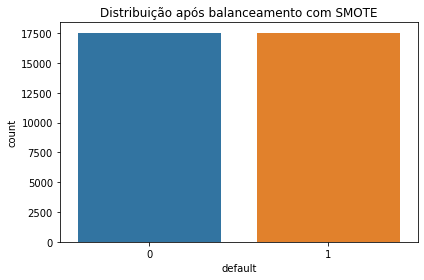

In [ ]:
# atribuindo os dados de treino final
X_train_final = X_train_4
y_train_final = y_train_4

# padronizando os dados de teste
X_test = minmax.transform(X_test)

# ver novo balanceamento
print(pd.Series(y_train_final).value_counts())

# imprimindo novo countplot
fig, ax = plt.subplots()
sns.countplot(y_train_final)
ax.set_title('Distribuição após balanceamento com SMOTE')
ax.set_xlabel('default')
plt.tight_layout()

In [ ]:
# verificando o formato dos dados finais
print('Formato de X_train_final:', X_train_final.shape)
print('Formato de y_train_final:', y_train_final.shape)
print('Formato de X_test:', X_test.shape)
print('Formato de y_test:', y_test.shape)

Formato de X_train_final: (35046, 66)
Formato de y_train_final: (35046,)
Formato de X_test: (7500, 66)
Formato de y_test: (7500,)


### Escolha dos modelos

In [ ]:
# instanciando os modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# cross-validation para avaliar o recall e o f1
model = []
recall = []
f1 = []


for clf in (rf, dt, sgdc, svc, xgb, lgbm):
  model.append(clf.__class__.__name__)
  scores_r = cross_val_score(clf, X_train_final, y_train_final, cv=5, scoring='recall')
  recall.append(scores_r.mean())
  scores_f = cross_val_score(clf, X_train_final, y_train_final, cv=5, scoring='f1')
  f1.append(scores_f.mean())
  data = list(zip(recall, f1))

pd.DataFrame(data=data, index=model, columns=['Recall', 'F-1 Score'])

,Recall,F-1 Score
RandomForestClassifier,0.819668,0.834411
DecisionTreeClassifier,0.758833,0.746985
SGDClassifier,0.517891,0.624550
SVC,0.608857,0.674849
XGBClassifier,0.684875,0.746590
LGBMClassifier,0.770937,0.805364


### Modelo 1 - Random Forest

Relatório de classificação - modelo 1:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5841
           1       0.46      0.58      0.52      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.70      0.68      7500
weighted avg       0.78      0.76      0.77      7500

AUC: 0.6956



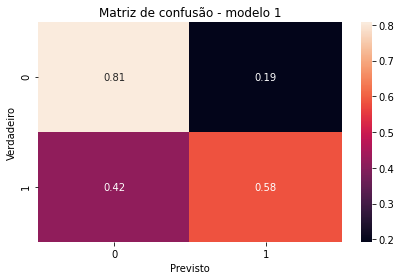

In [ ]:
# instanciando o modelo 1
model_1 = SVC(random_state=1)

# treinando o modelo 1
model_1.fit(X_train_final, y_train_final)

# fazendo previsões com dados de teste
y_pred_1 = model_1.predict(X_test)

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# imprimindo relatório de classificação
print("Relatório de classificação - modelo 1:")
print(classification_report(y_test, y_pred_1))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_1)))

# plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_1, normalize='true'), annot=True, ax=ax)
ax.set_title("Matriz de confusão - modelo 1")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.tight_layout()